In [237]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB

In [215]:
train = pd.read_csv('train_values.csv')
label = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_values.csv')

In [216]:
train_data = train.append(test,ignore_index=True)
train_data.shape

(270, 14)

In [217]:
label['heart_disease_present']

0      0
1      0
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     1
18     0
19     1
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     1
29     0
      ..
150    0
151    0
152    1
153    1
154    1
155    1
156    0
157    0
158    0
159    1
160    0
161    1
162    1
163    1
164    0
165    0
166    0
167    1
168    0
169    0
170    1
171    1
172    1
173    1
174    0
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [218]:
category_features = ['thal','slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results','sex','exercise_induced_angina']
for feature in category_features:
    features = pd.DataFrame()
    features = pd.get_dummies(train_data[feature],prefix=feature)
    train_data = pd.concat([train_data,features],axis=1)
    train_data = train_data.drop(feature,axis=1)
train_data.head()

,patient_id,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,thal_fixed_defect,thal_normal,thal_reversible_defect,slope_of_peak_exercise_st_segment_1,...,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,sex_0,sex_1,exercise_induced_angina_0,exercise_induced_angina_1
0,0z64un,128,308,0.0,45,170,0,1,0,1,...,0,1,0,0,0,1,0,1,1,0
1,ryoo3j,110,214,1.6,54,158,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
2,yt1s1x,125,304,0.0,77,162,0,1,0,1,...,1,1,0,0,0,1,0,1,0,1
3,l2xjde,152,223,0.0,40,181,0,0,1,1,...,0,1,0,1,0,0,0,1,1,0
4,oyt4ek,178,270,4.2,59,145,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0


In [219]:
# 归一化
# scaler = StandardScaler()
train_data = train_data.drop('patient_id',axis=1)
scaler = MinMaxScaler(feature_range=(0, 1)) 
temp_train_data = scaler.fit_transform(train_data)
train_data = pd.DataFrame(temp_train_data, columns = train_data.columns)

num_feature = ['resting_blood_pressure','serum_cholesterol_mg_per_dl','max_heart_rate_achieved','age']

# resting_blood_pressure_mean = list()
# serum_cholesterol_mg_per_dl_mean = list()
# max_heart_rate_achieved_mean = list()
# age_mean = list()

# mean
for i in num_feature:
    temp_list = list()
    for j in range(len(train_data.index)):
        temp_list.append(train_data[i][j] - np.mean(train_data[i]))
    train_data[i+'_mean'] = temp_list

# std
for i in num_feature:
    temp_list = list()
    for j in range(len(train_data.index)):
        temp_list.append(train_data[i][j] - np.std(train_data[i]))
    train_data[i+'_std'] = temp_list

# median
for i in num_feature:
    temp_list = list()
    for j in range(len(train_data.index)):
        temp_list.append(train_data[i][j] - np.median(train_data[i]))
    train_data[i+'_median'] = temp_list
    
print(train_data.columns)
train_data

Index(['resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved',
       'thal_fixed_defect', 'thal_normal', 'thal_reversible_defect',
       'slope_of_peak_exercise_st_segment_1',
       'slope_of_peak_exercise_st_segment_2',
       'slope_of_peak_exercise_st_segment_3', 'chest_pain_type_1',
       'chest_pain_type_2', 'chest_pain_type_3', 'chest_pain_type_4',
       'num_major_vessels_0', 'num_major_vessels_1', 'num_major_vessels_2',
       'num_major_vessels_3', 'fasting_blood_sugar_gt_120_mg_per_dl_0',
       'fasting_blood_sugar_gt_120_mg_per_dl_1', 'resting_ekg_results_0',
       'resting_ekg_results_1', 'resting_ekg_results_2', 'sex_0', 'sex_1',
       'exercise_induced_angina_0', 'exercise_induced_angina_1',
       'resting_blood_pressure_mean', 'serum_cholesterol_mg_per_dl_mean',
       'max_heart_rate_achieved_mean', 'age_mean',
       'resting_blood_pressure_std', 'serum_cholesterol_mg_per_dl_std',
       'ma

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,thal_fixed_defect,thal_normal,thal_reversible_defect,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,...,max_heart_rate_achieved_mean,age_mean,resting_blood_pressure_std,serum_cholesterol_mg_per_dl_std,max_heart_rate_achieved_std,age_std,resting_blood_pressure_median,serum_cholesterol_mg_per_dl_median,max_heart_rate_achieved_median,age_median
0,0.320755,0.415525,0.000000,0.333333,0.755725,0.0,1.0,0.0,1.0,0.0,...,0.155131,-0.196528,0.152561,0.297739,0.579215,0.143913,-0.018868,0.143836,0.125954,-0.208333
1,0.150943,0.200913,0.258065,0.520833,0.664122,0.0,1.0,0.0,0.0,1.0,...,0.063528,-0.009028,-0.017250,0.083127,0.487612,0.331413,-0.188679,-0.070776,0.034351,-0.020833
2,0.292453,0.406393,0.000000,1.000000,0.694656,0.0,1.0,0.0,1.0,0.0,...,0.094063,0.470139,0.124259,0.288606,0.518147,0.810580,-0.047170,0.134703,0.064885,0.458333
3,0.547170,0.221461,0.000000,0.229167,0.839695,0.0,0.0,1.0,1.0,0.0,...,0.239101,-0.300694,0.378976,0.103675,0.663185,0.039746,0.207547,-0.050228,0.209924,-0.312500
4,0.792453,0.328767,0.677419,0.625000,0.564885,0.0,0.0,1.0,0.0,0.0,...,-0.035708,0.095139,0.624259,0.210981,0.388376,0.435580,0.452830,0.057078,-0.064885,0.083333
5,0.339623,0.123288,0.000000,0.270833,0.603053,0.0,1.0,0.0,1.0,0.0,...,0.002460,-0.259028,0.171429,0.005501,0.426544,0.081413,0.000000,-0.148402,-0.026718,-0.270833
6,0.528302,0.301370,0.419355,0.645833,0.656489,0.0,0.0,1.0,0.0,1.0,...,0.055895,0.115972,0.360108,0.183583,0.479979,0.456413,0.188679,0.029680,0.026718,0.104167
7,0.528302,0.342466,0.096774,0.583333,0.312977,1.0,0.0,0.0,0.0,1.0,...,-0.287617,0.053472,0.360108,0.224679,0.136467,0.393913,0.188679,0.070776,-0.316794,0.041667
8,0.716981,0.456621,0.548387,0.625000,0.526718,0.0,0.0,1.0,0.0,0.0,...,-0.073876,0.095139,0.548788,0.338835,0.350208,0.435580,0.377358,0.184932,-0.103053,0.083333
9,0.245283,0.212329,0.258065,0.437500,0.664122,0.0,1.0,0.0,0.0,1.0,...,0.063528,-0.092361,0.077090,0.094542,0.487612,0.248080,-0.094340,-0.059361,0.034351,-0.104167


In [220]:
# # 相关性分析
# train_data = train_data.merge()
# corr = train_data.corr()
# print(corr['heart_disease_present'].sort_values(ascending=False))

In [221]:
train_length = len(train)
train_X = train_data[:train_length]
train_y = label['heart_disease_present']
print(train_X.shape)
print(train_y.shape)

(180, 40)
(180,)


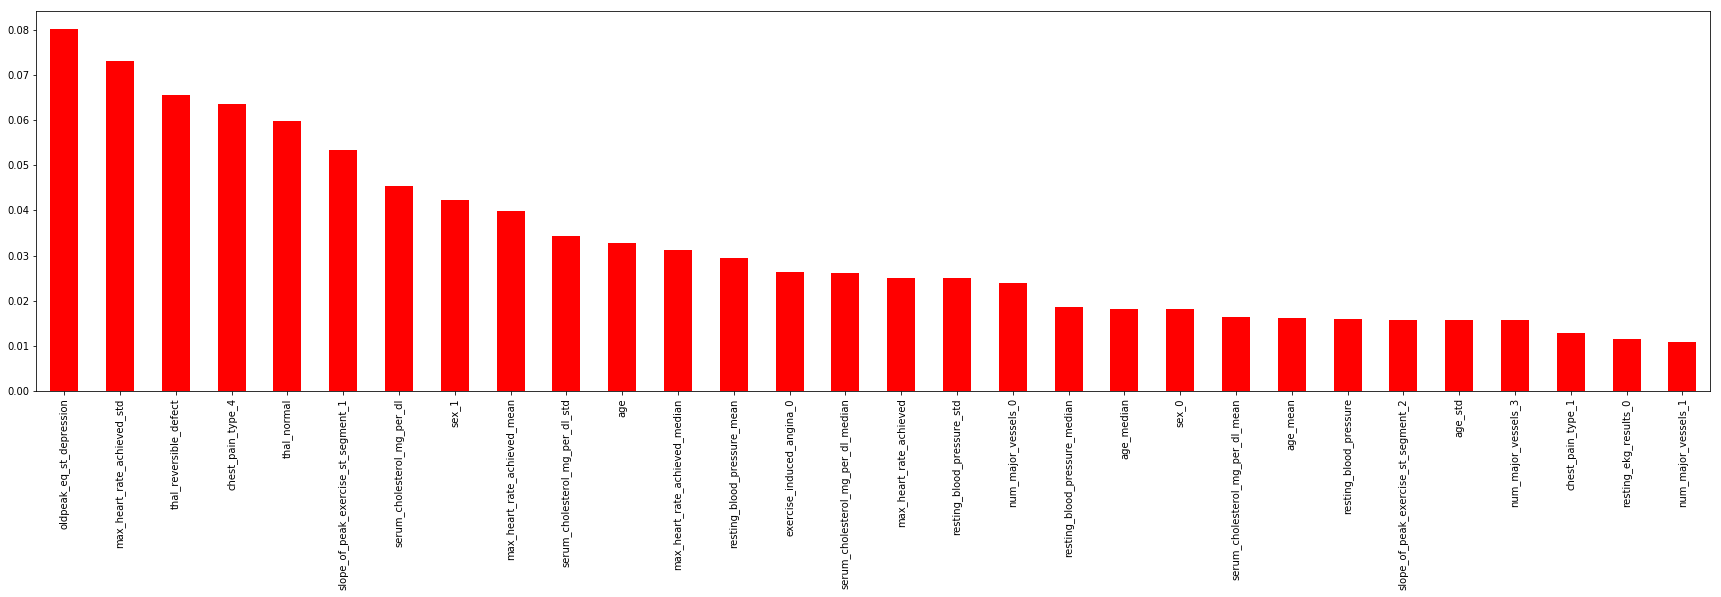

In [222]:
# 使用随机森林选择特征
# train_data = train_data.drop('heart_disease_present',axis=1)
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)
# print(rfc.feature_importances_)
plt.figure(figsize=(30, 7))
features = pd.Series(rfc.feature_importances_, index= train_data.columns)
features.nlargest(30).plot(kind = 'bar', color = 'r')
plt.show()

In [223]:
print(len(list(train_data.columns)))
print(features.nlargest(30))
features.nlargest(30).index

40
oldpeak_eq_st_depression               0.080199
max_heart_rate_achieved_std            0.073068
thal_reversible_defect                 0.065541
chest_pain_type_4                      0.063453
thal_normal                            0.059722
slope_of_peak_exercise_st_segment_1    0.053373
serum_cholesterol_mg_per_dl            0.045483
sex_1                                  0.042393
max_heart_rate_achieved_mean           0.039923
serum_cholesterol_mg_per_dl_std        0.034323
age                                    0.032703
max_heart_rate_achieved_median         0.031179
resting_blood_pressure_mean            0.029575
exercise_induced_angina_0              0.026348
serum_cholesterol_mg_per_dl_median     0.026090
max_heart_rate_achieved                0.025146
resting_blood_pressure_std             0.024991
num_major_vessels_0                    0.023976
resting_blood_pressure_median          0.018589
age_median                             0.018210
sex_0                                

Index(['oldpeak_eq_st_depression', 'max_heart_rate_achieved_std',
       'thal_reversible_defect', 'chest_pain_type_4', 'thal_normal',
       'slope_of_peak_exercise_st_segment_1', 'serum_cholesterol_mg_per_dl',
       'sex_1', 'max_heart_rate_achieved_mean',
       'serum_cholesterol_mg_per_dl_std', 'age',
       'max_heart_rate_achieved_median', 'resting_blood_pressure_mean',
       'exercise_induced_angina_0', 'serum_cholesterol_mg_per_dl_median',
       'max_heart_rate_achieved', 'resting_blood_pressure_std',
       'num_major_vessels_0', 'resting_blood_pressure_median', 'age_median',
       'sex_0', 'serum_cholesterol_mg_per_dl_mean', 'age_mean',
       'resting_blood_pressure', 'slope_of_peak_exercise_st_segment_2',
       'age_std', 'num_major_vessels_3', 'chest_pain_type_1',
       'resting_ekg_results_0', 'num_major_vessels_1'],
      dtype='object')

In [224]:
selected_features = ['thal_reversible_defect', 'chest_pain_type_4',
       'oldpeak_eq_st_depression', 'max_heart_rate_achieved_median',
       'num_major_vessels_0', 'exercise_induced_angina_0', 'age_median',
       'age_mean', 'max_heart_rate_achieved_mean',
       'serum_cholesterol_mg_per_dl', 'slope_of_peak_exercise_st_segment_1',
       'resting_blood_pressure_std', 'resting_blood_pressure_median',
       'max_heart_rate_achieved_std', 'max_heart_rate_achieved', 'sex_0',
       'serum_cholesterol_mg_per_dl_mean', 'age_std',
       'serum_cholesterol_mg_per_dl_median', 'thal_normal', 'sex_1',
       'resting_blood_pressure_mean', 'chest_pain_type_1',
       'serum_cholesterol_mg_per_dl_std', 'age', 'chest_pain_type_3',
       'slope_of_peak_exercise_st_segment_3', 'resting_blood_pressure',
       'num_major_vessels_2', 'resting_ekg_results_0']
train_X = train_X[selected_features]

In [225]:
# clf = LogisticRegression()
# clf.fit(train_X,train_y)
# clf.score(train_X,train_y)


# in_sample_preds1 = clf.predict(train_X)
# print(log_loss(train_y, in_sample_preds1))

In [226]:
#  from sklearn.svm import SVC  
# model = SVC(kernel='rbf', probability=True)  
# model.fit(train_X, train_y)

# in_sample_preds1 = clf.predict(train_X)
# print(log_loss(train_y, in_sample_preds1))

In [227]:
 from sklearn.neighbors import KNeighborsClassifier  
model = KNeighborsClassifier()  
model.fit(train_X, train_y) 
in_sample_preds1 = clf.predict(train_X)
print(log_loss(train_y, in_sample_preds1))

4.221441541485982


In [229]:
clf = BayesianRidge()
clf.fit(train_X,train_y)
clf.score(train_X,train_y)
in_sample_preds1 = clf.predict(train_X)
print(log_loss(train_y, in_sample_preds1))
# BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False,
#         copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
#         n_iter=300, normalize=False, tol=0.001, verbose=False)

0.3729817506850051


In [239]:
clf =  GaussianNB()
clf.fit(train_X,train_y)
clf.score(train_X,train_y)
in_sample_preds1 = clf.predict(train_X)
print(log_loss(train_y, in_sample_preds1))

5.372760741230677


In [231]:
test_X = train_data[selected_features][train_length:]
pred = clf.predict(test_X)
pred = pred.astype('float64')
pred.shape

(90,)

In [232]:
submission_format = pd.read_csv('submission_format.csv', index_col='patient_id')
my_submission = pd.DataFrame(data=pred,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.to_csv('my_submission_BayesianRidge.csv')